# `RedPlanet` Demo
Written by Zain Kamal -- [zain.eris.kamal@rutgers.edu](mailto:zain.eris.kamal@rutgers.edu).

Hosted on [Google Colab](https://drive.google.com/drive/folders/1UxBJzFugjNnjnxebbso7bYJ1cYgEZyzj?usp=sharing).

[Project Repo](https://github.com/Humboldt-Penguin/redplanet)

---
Install RedPlanet with `pip`. 
- If you're on your own computer, use a separate environment with venv, conda, poetry, etc (we recommend [mamba](https://mamba.readthedocs.io/en/latest/installation.html)). 
- If you're on Google Colab, uncomment and run the cell below (prepending `!` runs shell commands in notebooks):

In [1]:
# !python -m pip install redplanet

---
# 1. `Craters`

The `Craters` module is fairly straightforward, just accessing crater coordinates/sizes. This is useful for later plotting.

In [2]:
from redplanet import Craters

In [3]:
'''Access all available craters, return a pandas dataframe'''
Craters.get_database()

ID        name     lat      lon  diameter_km  depth_rimfloor  \
0      30-000000  Prometheus -85.075   91.590      1164.22            0.00   
1      19-000000       Ladon -18.240  -26.912      1096.65            0.00   
2      19-000001             -25.097  -32.734       624.50            0.00   
3      20-000000              -6.130   12.963       512.75            0.82   
4      21-000000     Huygens -13.882   55.582       467.25            1.44   
...          ...         ...     ...      ...          ...             ...   
24375  26-001080             -30.343   -3.044        10.00            0.17   
24376  27-001288             -42.060   40.779        10.00            0.32   
24377  27-001289             -48.432   51.506        10.00            0.21   
24378  27-001290             -31.379   54.352        10.00            0.38   
24379  28-000892             -48.423  103.310        10.00            0.00   

       n_layers  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
24375         0  
24376         0  
24377         0  
24378         0  
24379         0  

[24380 rows x 7 columns]

In [4]:
'''Access a subset of craters'''
Craters.get_database(minDiam=400, maxDiam=500)

# '''If you want the results as an array of dictionaries:'''
# Craters.get_database(minDiam=400, maxDiam=500, dict=True)

ID          name     lat     lon  diameter_km  depth_rimfloor  \
4  21-000000       Huygens -13.882  55.582       467.25            1.44   
5  20-000001  Schiaparelli  -2.508  16.800       445.76            1.14   
6  27-000000               -36.774   2.813       427.15            0.95   
7  12-000000       Cassini  23.351  32.110       408.23            1.73   
8  13-000000     Antoniadi  21.382  60.831       400.95            1.12   

   n_layers  
4         0  
5         0  
6         0  
7         0  
8         0

In [5]:
'''Access an individual crater by name or ID; returns a dictionary'''
Craters.get('Henry')

{'ID': '12-000004',
 'name': 'Henry',
 'lat': 10.79,
 'lon': 23.447,
 'diameter_km': 167.57,
 'depth_rimfloor': 2.06,
 'n_layers': 0}

If you ever need a refresher on how to use the module/methods, call `help`

In [6]:
# help(Craters)
# help(Craters.get_database)
# help(Craters.get)

---
# 2. `GRS`

In [8]:
from redplanet import GRS
# from redplanet import GRS as grs # optional custom alias

## 2.1. `visualize`

Let's start by building intuition for the dataset via quick visualizations.

The elements available are: ['al','ca','cl','fe','h2o','k','si','s','th'].

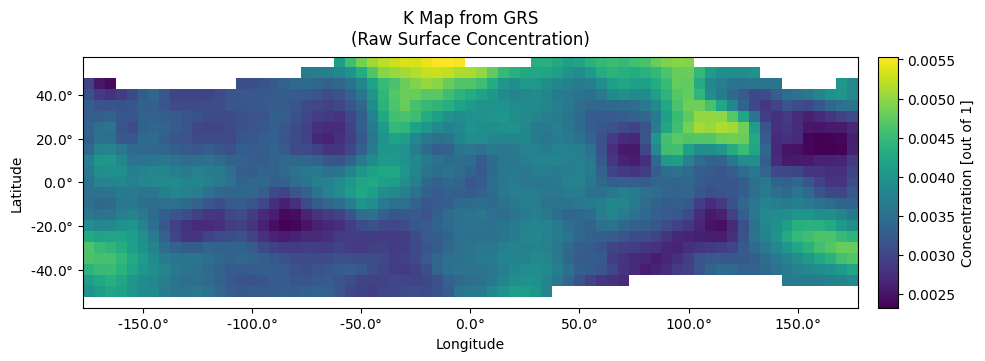

In [7]:
'''Original GRS dataset'''

GRS.visualize(element_name='k')

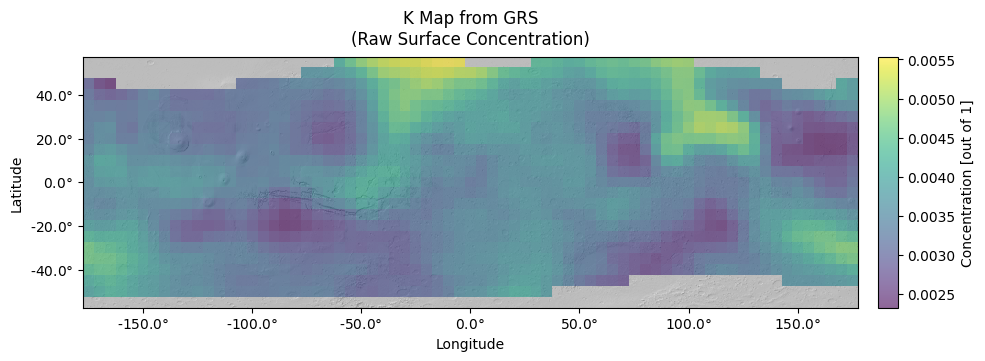

In [9]:
'''You can enable a MOLA shaded relief overlay with `overlay=True`'''

GRS.visualize(element_name='k', overlay=True)

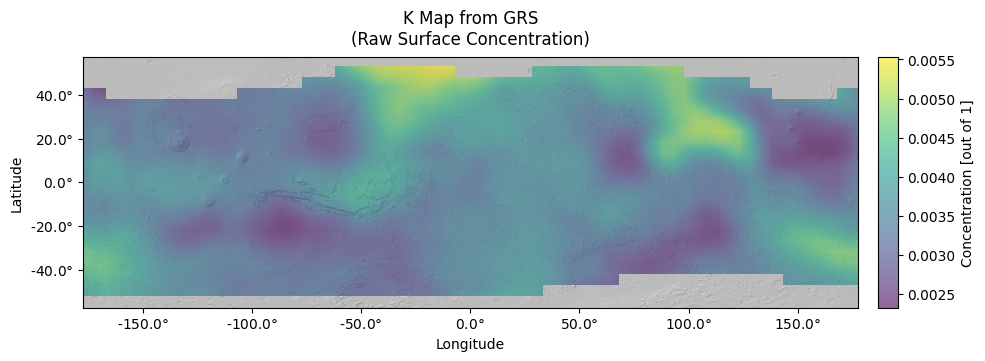

In [10]:
'''The original GRS data are binned to 5x5 degrees. We can increase the resolution by interpolating to a finer grid. 
By default, `grid_spacing=5` -- we advise starting here reducing until the desired resolution is achieved. Starting too small can take a long time to plot with no visual improvement.'''

GRS.visualize(element_name='k', overlay=True, grid_spacing=1)

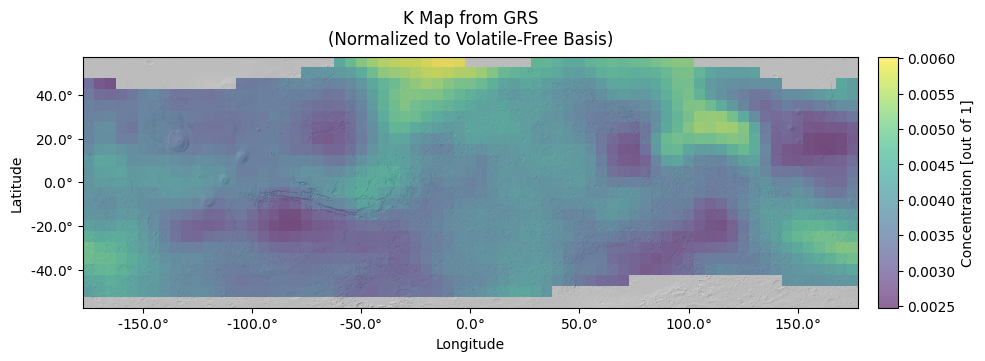

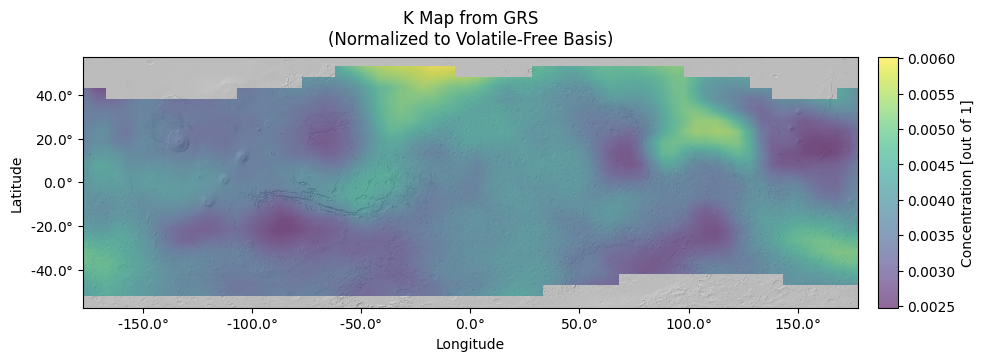

In [14]:
'''
GRS data represent shallow Martian subsurface (top few decimeters). We can get a representative value for the bulk chemistry of the entire crust by normalizing to a volatile-free basis (free from Cl, H2O, and S). By default, `normalize=False`.

Source: "Groundwater production from geothermal heating on early Mars and implication for early martian habitability", Ojha et al. 2020, https://www.science.org/doi/10.1126/sciadv.abb1669
    > "For such measurement [from GRS] to represent the bulk chemistry of the martian upper crust, it must be normalized to a volatile-free basis (22). That equates to a 7 to 14% increase in the K, Th, and U abundances (22), which we applied to the chemical maps by renormalizing to Cl, stoichiometric H2O, and S-free basis."
'''

GRS.visualize(element_name='k', normalize=True, overlay=True, grid_spacing=1)

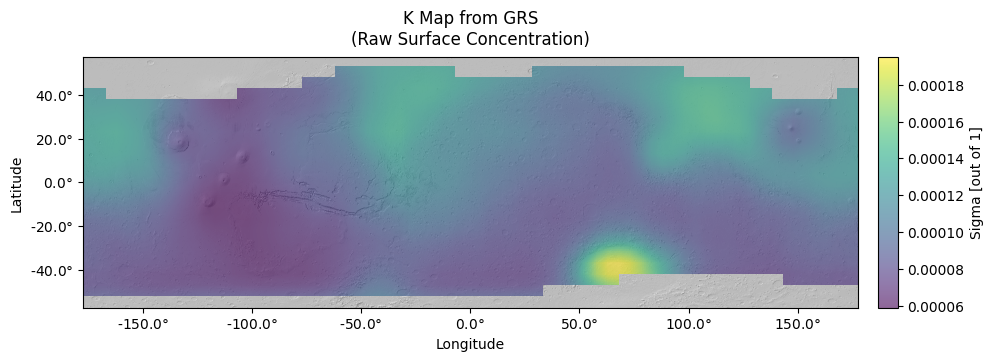

In [12]:
'''By default, we're plotting elemental concentrations (`quantity='concentration'`). However we can also plot the error associated with the measurements
(on a side note, you can list arguments in any order, and you can leave out 'element_name=' if you want)'''

GRS.visualize('k', overlay=True, grid_spacing=1, quantity='sigma')

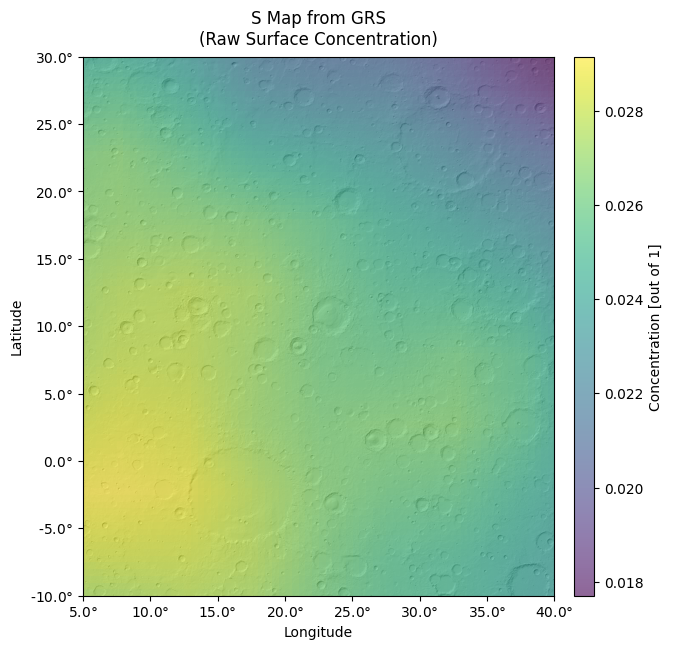

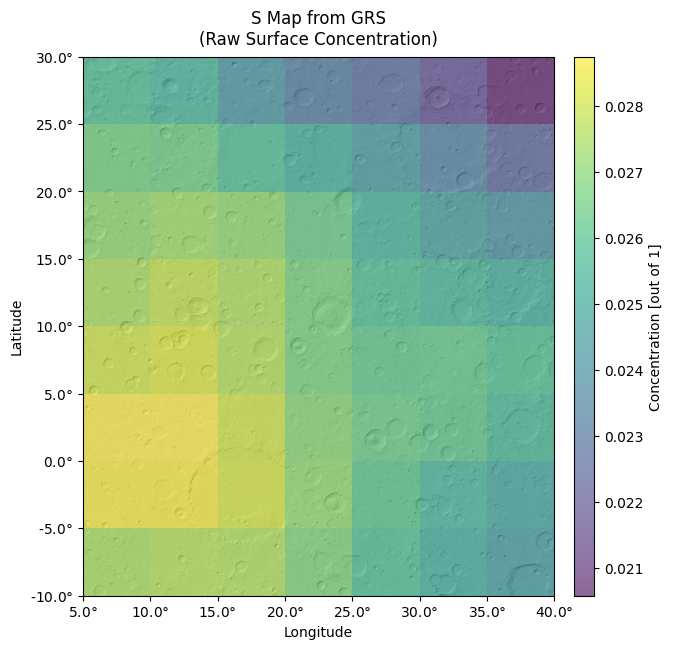

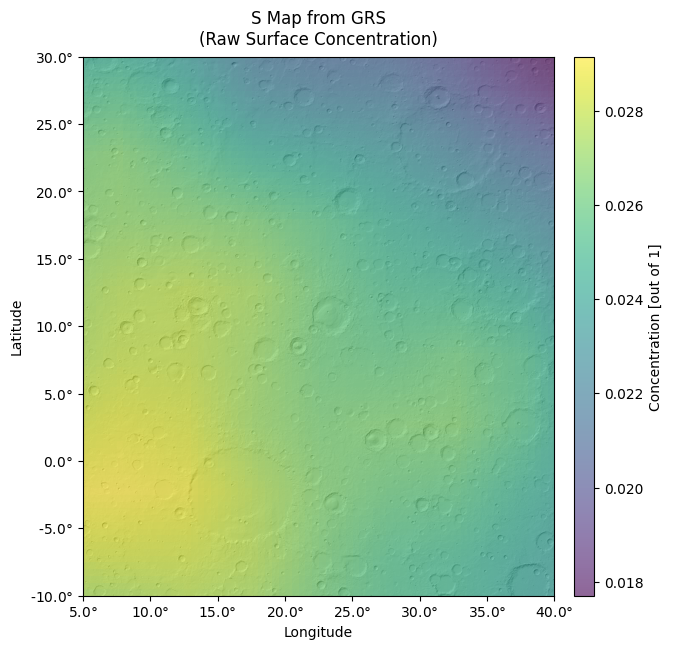

In [15]:
'''You can zoom in on certain regions for higher resolution. 
Let's look at a sulfur map of Arabia Terra.'''

GRS.visualize(element_name='s', lon_bounds=(5,40), lat_bounds=(-10,30), grid_spacing=0.5, overlay=True)

## 2.2. `get`

The `visualize` method really just calls the `get` method over a grid of values. Use `get` directly if you want to extract values for the sake of calculations.

In [14]:
'''Let's get potassium concentrations at Henry crater'''

from redplanet import Craters

henry = Craters.get('Henry')

lon, lat = henry['lon'], henry['lat']

raw = GRS.get(element_name='k', lon=lon, lat=lat)
norm = GRS.get(element_name='k', lon=lon, lat=lat, normalize=True)

print(f'Surface potassium concentration: \t{raw*100:.5f} wt%')
print(f'Bulk potassium concentration: \t\t{norm*100:.5f} wt%')
print(f'Percent difference: \t\t\t{(norm-raw)/raw*100:.5f} %')

Surface potassium concentration: 	0.37349 wt%
Bulk potassium concentration: 		0.41099 wt%
Percent difference: 			10.04277 %


## 2.3. Documentation

If you ever need a refresher on how to use the module/methods, call `help`

In [15]:
# help(GRS)
# help(GRS.visualize)
# help(GRS.get)

---
# 3. `Crust`

In [18]:
from redplanet import Crust
Crust.load_model(RIM='Khan2022', insight_thickness=41, rho_north=2900, rho_south=2700)
# from redplanet import Crust as cr # optional custom alias

True

## 3.1. `visualize`

Let's start by building intuition for the dataset via quick visualizations.

We can create a map of topography ('topo'/'topography'), moho elevation ('moho'), crustal thickness ('thick'/'thickness'), or crustal density ('rho'/'density'). 

[Note: Model name is formatted f'{Reference_Interior_Model}-{insight_thickness}-{rho_south}-{rho_north}'.]

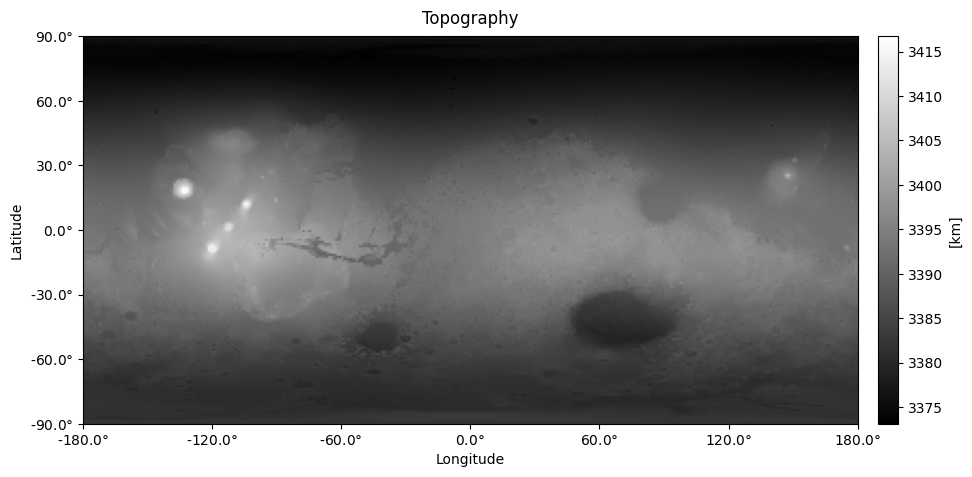

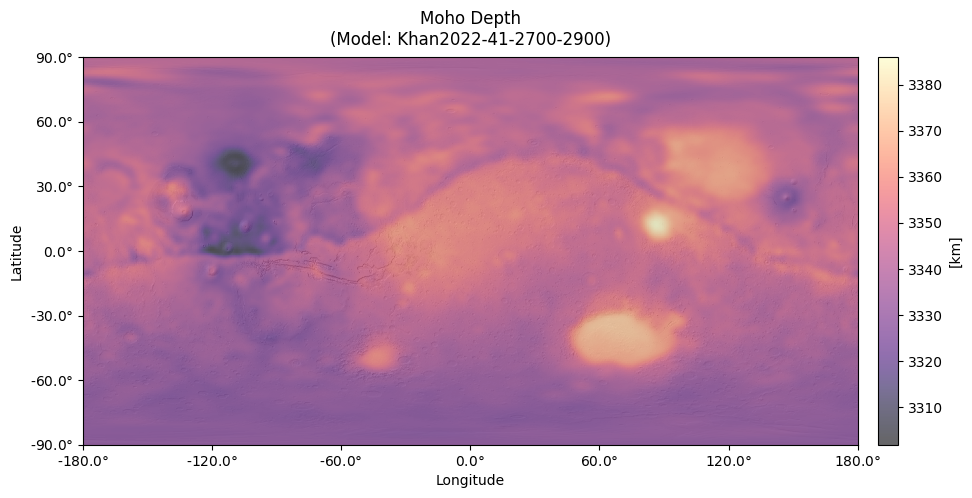

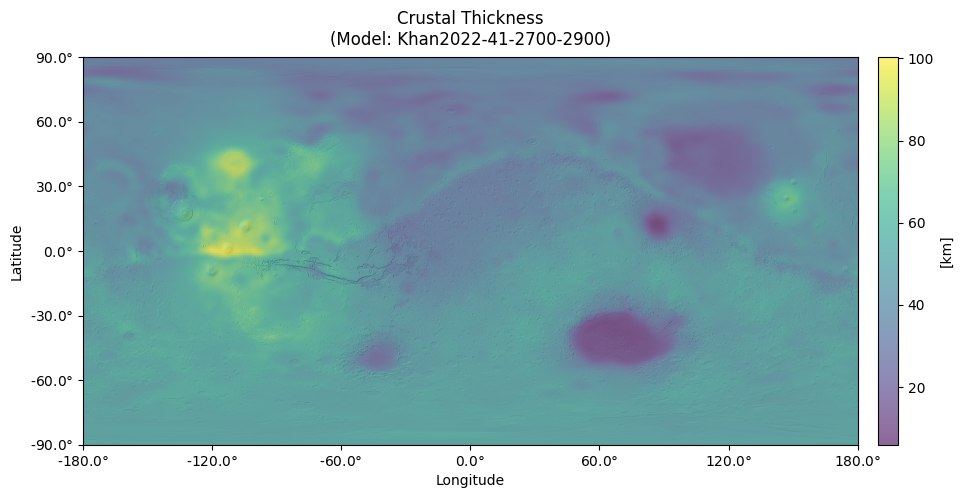

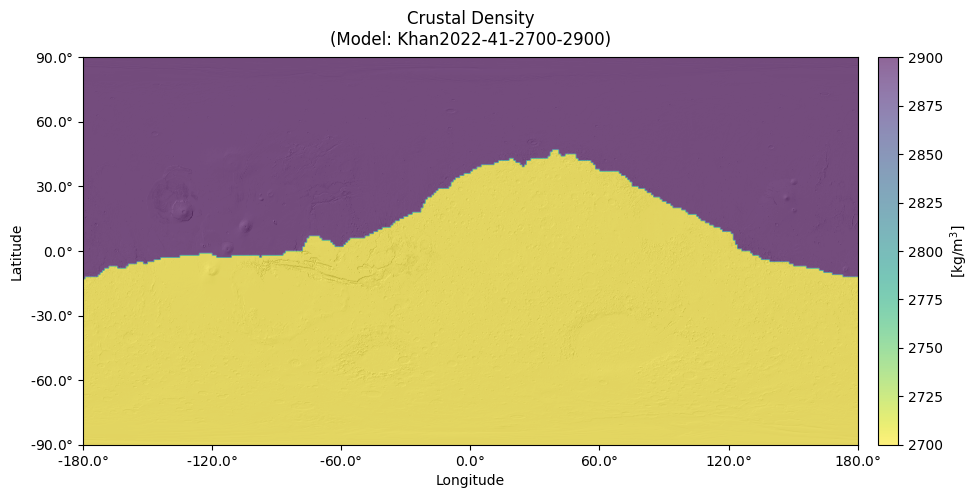

In [19]:
'''Full maps with MOLA overlay'''

Crust.visualize(quantity='topo')
Crust.visualize(quantity='moho', overlay=True)
Crust.visualize(quantity='thick', overlay=True)
Crust.visualize(quantity='rho', overlay=True)

A summary of all available models can be found here: https://docs.google.com/spreadsheets/d/1ZDILcSPdbXAFp60VfyC4xTZzdnAVhx_U/edit?usp=sharing&ouid=107564547097010500390&rtpof=true&sd=true.


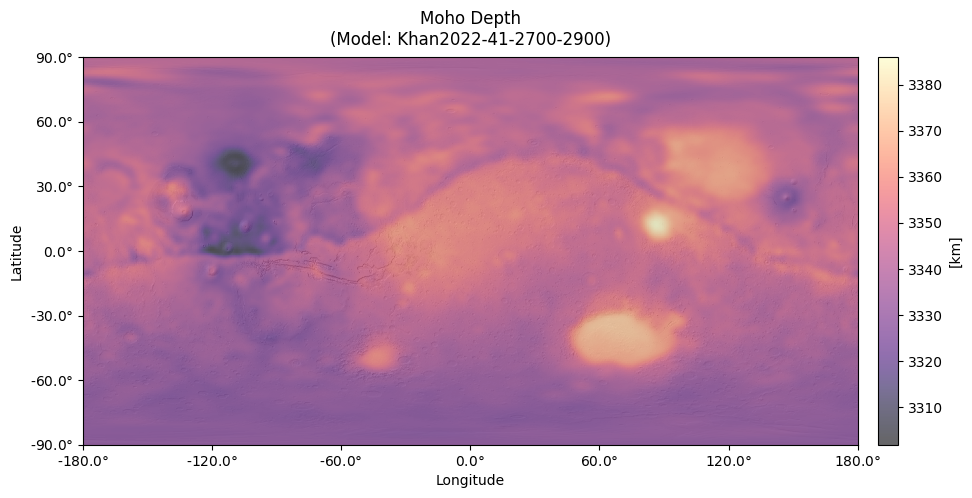

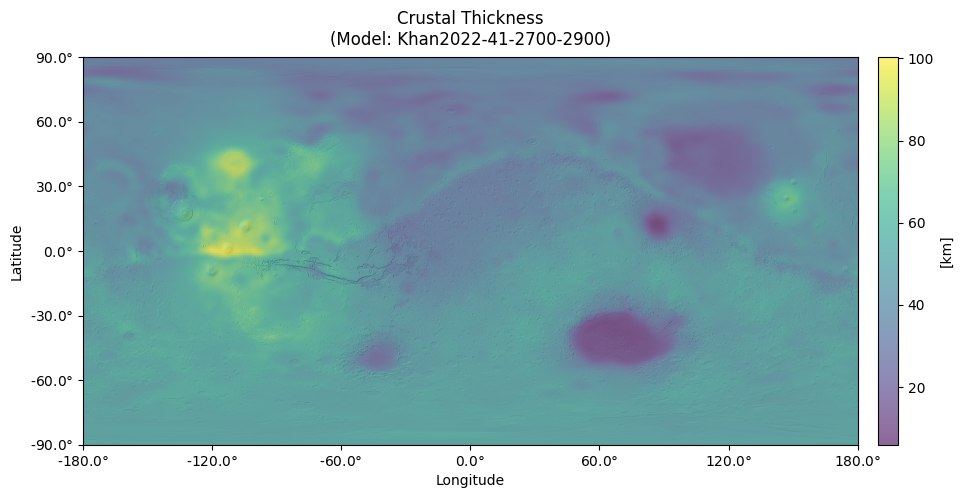

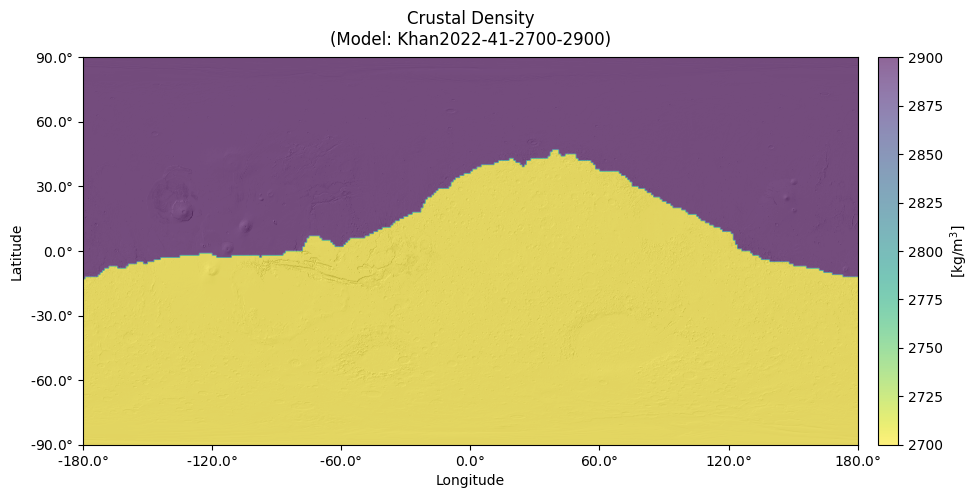

In [18]:
'''We can change the parameters used to generate moho/thickness/density models on the fly.'''

Crust.peek_models()

# The default model used to generate plots above:
# Crust.load_model(RIM='Khan2022', insight_thickness=39, rho_north=2900, rho_south=2900)

# Let's try a different model with inhomogeneous crustal density:
Crust.load_model(RIM='Khan2022', insight_thickness=41, rho_north=2900, rho_south=2700)

Crust.visualize(quantity='moho', overlay=True)
Crust.visualize(quantity='thick', overlay=True)
Crust.visualize(quantity='rho', overlay=True)

# Compare with prior plots to see the differences!

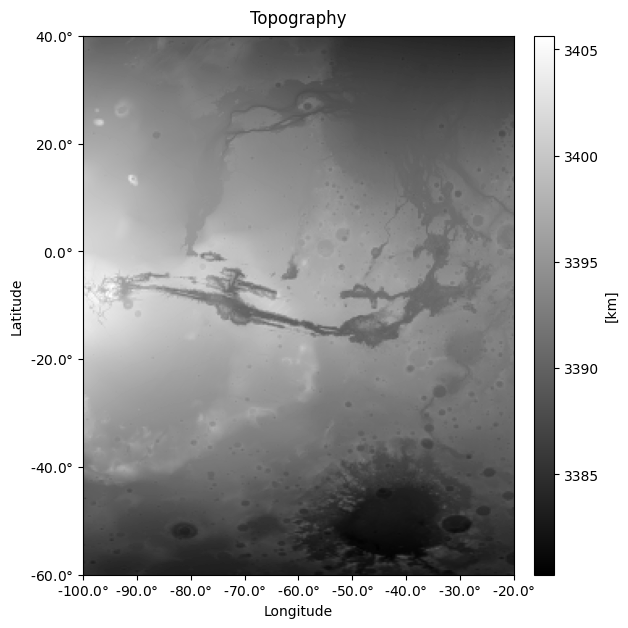

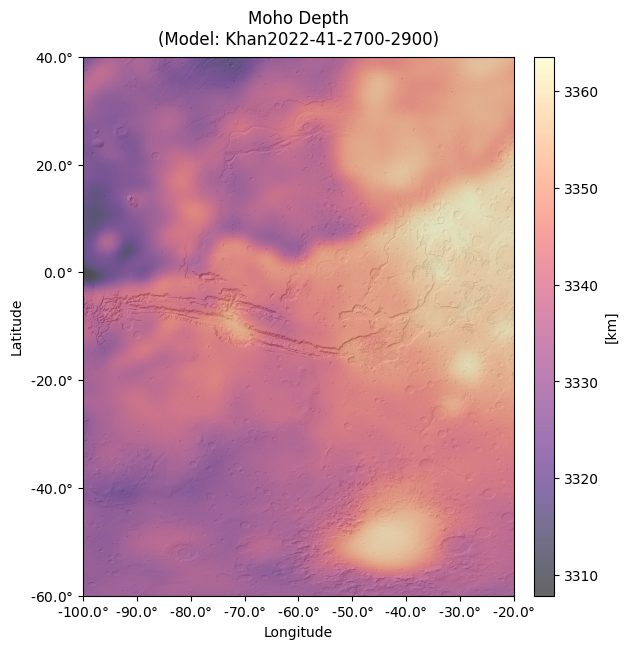

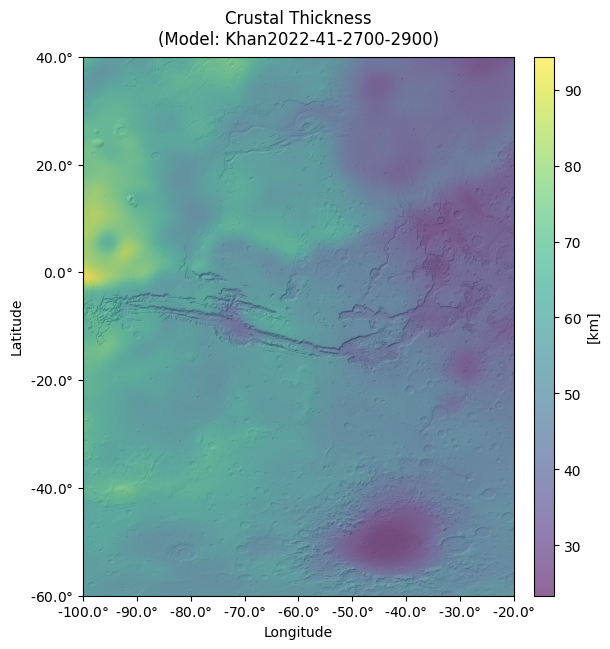

In [19]:
'''You can zoom in on certain regions and decrease grid spacing for higher resolution. 
Let's let's get a cool shot of some outflow channels, Valles Marineris, and Argyre basin.'''

lons = (-100,-20)
lats = (-60,40)

Crust.visualize(quantity='topo', lon_bounds=lons, lat_bounds=lats, grid_spacing=0.3)
Crust.visualize(quantity='moho', lon_bounds=lons, lat_bounds=lats, overlay=True, grid_spacing=0.5)
Crust.visualize(quantity='thick', lon_bounds=lons, lat_bounds=lats, overlay=True, grid_spacing=0.5)

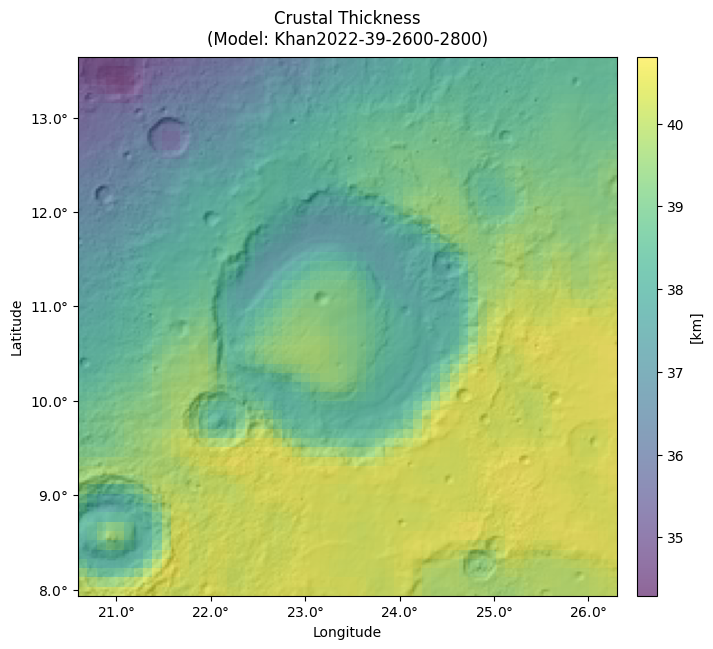

In [30]:
'''Next, let's visualize Henry Crater in Arabia Terra.'''

from redplanet import Craters
from redplanet import utils

thiscrater = Craters.get('henry')
lon, lat, rad = thiscrater['lon'], thiscrater['lat'], utils.km2theta(thiscrater['diameter_km']/2)
scaling = 2
lon_bounds = (lon-rad*scaling, lon+rad*scaling)
lat_bounds = (lat-rad*scaling, lat+rad*scaling)

Crust.visualize(quantity='thick', lon_bounds=lon_bounds, lat_bounds=lat_bounds, overlay=True, grid_spacing=0.1)
# Crust.visualize(quantity='thick', lon_bounds=lon_bounds, lat_bounds=lat_bounds, overlay=True, grid_spacing=0.01)

## 3.2. `get`

The `visualize` method really just calls the `get` method over a grid of values. Use `get` directly if you want to extract values for the sake of calculations.

Text(0, 0.5, 'Crustal Thickness [km]')

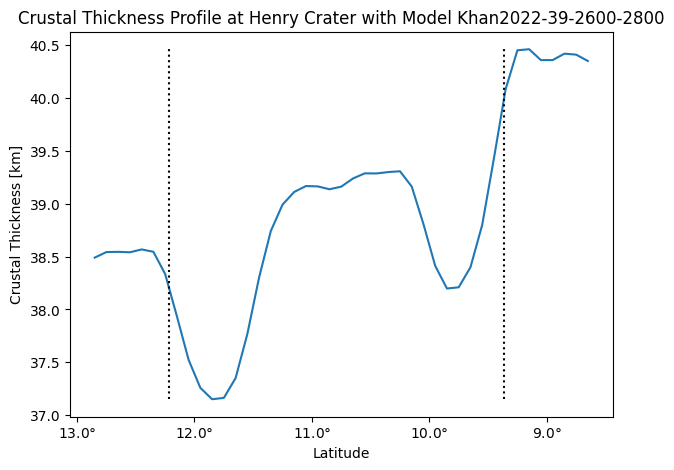

In [21]:
'''let's plot a crustal thickness profile across Henry Crater'''

Crust.load_model(RIM='Khan2022', insight_thickness=39, rho_north=2800, rho_south=2600)
############################################
'''setup'''
from redplanet import Craters
from redplanet import utils

import numpy as np
import matplotlib.pyplot as plt

name = 'henry' # TODO: Try other craters! (Gusev, Newton, Gale, etc)

thiscrater = Craters.get(name)
lon, lat, rad = thiscrater['lon'], thiscrater['lat'], utils.km2theta(thiscrater['diameter_km']/2)
scaling = 1.5

lat_range = np.arange(lat-rad*scaling, lat+rad*scaling, 0.1) # you can't get higher resolution than 0.1 degrees since that's the resolution of the data



############################################
'''construct data with `get`'''
dat_crust = [Crust.get('thick', lon, this_lat) for this_lat in lat_range] # we use list comprehension but for loops are functionally equivalent (slightly slower)
dat_crust = np.asarray(dat_crust)


############################################
'''plotting'''
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
lin, = ax.plot(lat_range, dat_crust)

ax.invert_xaxis()

ax.vlines(x=[lat-rad,lat+rad], ymin=np.amin(dat_crust), ymax=np.amax(dat_crust), colors='k', linestyles='dotted')

ax.set_title(f'Crustal Thickness Profile at {name.capitalize()} Crater with Model {Crust.get_model_name()}')
ax.set_xlabel('Latitude')
ax.xaxis.set_major_formatter('{x}$\degree$')
ax.set_ylabel('Crustal Thickness [km]')

# fig.savefig(name)
# plt.close(fig)

In [22]:
# '''let's save a ton of crustal thickness profiles'''

# import numpy as np
# import matplotlib.pyplot as plt

# craters = Craters.get_database(minDiam=150, maxDiam=300, dict=True)



# for crater in craters:
#     name = crater['ID']

#     thiscrater = Craters.get(name)
#     lon, lat, rad = thiscrater['lon'], thiscrater['lat'], utils.km2theta(thiscrater['diameter_km']/2)
#     scaling = 3

#     lat_range = np.arange(lat-rad*scaling, lat+rad*scaling, 0.1) # you can't get higher resolution than 0.1 degrees since that's the resolution of the data


#     dat_crust = []
#     for this_lat in lat_range:
#         dat_crust.append(Crust.get('thick', lon, this_lat))     # NOTE this is where we call `get`
#     dat_crust = np.asarray(dat_crust)


#     fig = plt.figure(figsize=(7,5))
#     ax = plt.axes()
#     lin, = ax.plot(lat_range, dat_crust)

#     ax.invert_xaxis()

#     ax.vlines(x=[lat-rad,lat+rad], ymin=np.amin(dat_crust), ymax=np.amax(dat_crust), colors='k', linestyles='dotted')

#     ax.set_title(f'Crustal Thickness Profile at {name.capitalize()} Crater with Model {Crust.get_model_name()}')
#     ax.set_xlabel('Latitude')
#     ax.xaxis.set_major_formatter('{x}$\degree$')
#     ax.set_ylabel('Crustal Thickness [km]')

#     fig.savefig(name)
#     plt.close(fig)

Text(0, 0.5, 'Crustal Thickness [km]')

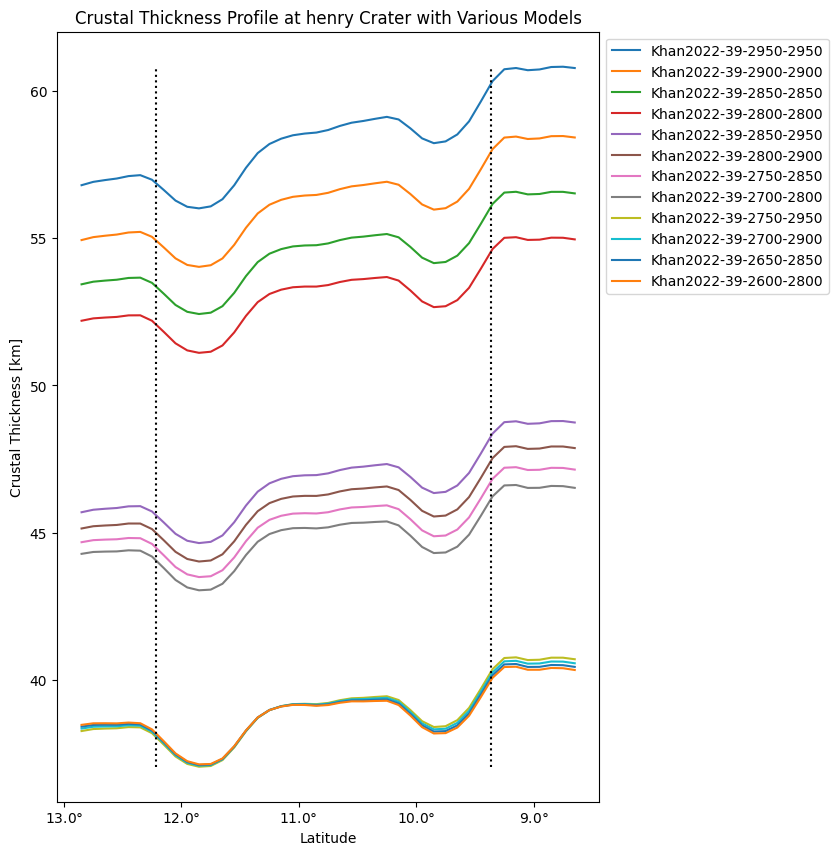

In [23]:
'''let's plot a crustal thickness profile across Henry Crater with MANY models to show the differences'''


############################################
'''setup'''

from redplanet import Craters
from redplanet import utils

import numpy as np
import matplotlib.pyplot as plt

name = 'henry' # Try out other craters (Gusev, Newton, Gale, etc)

thiscrater = Craters.get(name)
lon, lat, rad = thiscrater['lon'], thiscrater['lat'], utils.km2theta(thiscrater['diameter_km']/2)
scaling = 1.5

lat_range = np.arange(lat-rad*scaling, lat+rad*scaling, 0.1) # you can't get higher resolution than 0.1 degrees since that's the resolution of the data



############################################
'''construct data with `get`'''

meta_dat = []
meta_dat_names = []

for rhos_diff in (0, -100, -200):
    for rhon in np.arange(2950, 2750, -50):
        
        rhos=rhon+rhos_diff # this indexing is a bit confusing, but it makes it so we can read the legend top to bottom
        
        RIM='Khan2022'
        insight_thickness=39
        
        if Crust.load_model(RIM=RIM, insight_thickness=insight_thickness, rho_north=rhon, rho_south=rhos, suppress_model_error=True):

            dat_crust = [Crust.get('thick', lon, this_lat) for this_lat in lat_range] # we use list comprehension but for loops are functionally equivalent (slightly slower)
            dat_crust = np.asarray(dat_crust)

            meta_dat.append(dat_crust)
            meta_dat_names.append(Crust.get_model_name())

        else:
            print(f'Model {RIM}-{insight_thickness}-{rhos}-{rhon} does not exist.')
            


############################################
'''plotting'''

fig = plt.figure(figsize=(7,10))
ax = plt.axes()

for i in range(len(meta_dat)):
    lin, = ax.plot(lat_range, meta_dat[i])
    lin.set_label(meta_dat_names[i])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# '''optional: invert the order of legend entries so we can read from top to bottom'''
# handles, labels = ax.get_legend_handles_labels()
# handles = handles[::-1]
# labels = labels[::-1]
# ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

ax.invert_xaxis()

alldata = np.concatenate(meta_dat)
ax.vlines(x=[lat-rad, lat+rad], ymin=alldata.min(), ymax=alldata.max(), colors='k', linestyles='dotted')

ax.set_title(f'Crustal Thickness Profile at {name} Crater with Various Models')
ax.set_xlabel('Latitude')
ax.xaxis.set_major_formatter('{x}$\degree$')
ax.set_ylabel('Crustal Thickness [km]')

## 3.3. Documentation

If you ever need a refresher on how to use the module/methods, call `help`

In [24]:
# help(Crust)
# help(Crust.visualize)
# help(Crust.get)
# help(Crust.load_model)

---
# Miscellaneous

## I. Clear cached data

In [25]:
import redplanet
help(redplanet.clear_cache)

# redplanet.clear_cache()
# redplanet.clear_cache(force=True)

Help on function clear_cache in module redplanet:

clear_cache(force=False)
    DESCRIPTION:
    ------------
        Clear the cache folder containing all files downloaded by redplanet. Max size will not exceed 1GB. If `force=True`, will not prompt with folder name and ask for confirmation.

